In [1]:
import numpy as np
import pandas as pd
myData = pd.read_csv('../data/Blood Transfusion Service data.csv')
print(myData.shape)

(748, 6)


In [2]:
peek = myData.head(10)
print(peek)

   id  Recency  Frequency  Monetary  Time  Class(Target)
0   1        2         50     12500    98              2
1   2        0         13      3250    28              2
2   3        1         16      4000    35              2
3   4        2         20      5000    45              2
4   5        1         24      6000    77              1
5   6        4          4      1000     4              1
6   7        2          7      1750    14              2
7   8        1         12      3000    35              1
8   9        2          9      2250    22              2
9  10        5         46     11500    98              2


In [3]:
shape = myData.shape
print(shape)

(748, 6)


In [4]:
types = myData.dtypes
print(types)

id               int64
Recency          int64
Frequency        int64
Monetary         int64
Time             int64
Class(Target)    int64
dtype: object


In [6]:
outcome_counts = myData.groupby('Class(Target)').size()
print(outcome_counts)

Class(Target)
1    570
2    178
dtype: int64


In [7]:
# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# from numpy import set_printoptions
# 
# label_encoder = LabelEncoder()
# 
# categorical_columns = ['Gender','Smoking','Hx Smoking','Hx Radiothreapy','Thyroid Function','Physical Examination','Adenopathy','Pathology','Focality','Risk','T','N','M','Stage','Response','Recurred']
# 
# for col in categorical_columns:
#     myData[col] = label_encoder.fit_transform(myData[col])

In [8]:
from pandas import set_option

set_option('display.width', 100)
set_option('precision', 3)
correlations = myData.corr(method = 'pearson')
print(correlations)

                  id  Recency  Frequency  Monetary   Time  Class(Target)
id             1.000    0.457     -0.164    -0.164  0.115         -0.207
Recency        0.457    1.000     -0.183    -0.183  0.161         -0.280
Frequency     -0.164   -0.183      1.000     1.000  0.635          0.219
Monetary      -0.164   -0.183      1.000     1.000  0.635          0.219
Time           0.115    0.161      0.635     0.635  1.000         -0.036
Class(Target) -0.207   -0.280      0.219     0.219 -0.036          1.000


<AxesSubplot:ylabel='Frequency'>

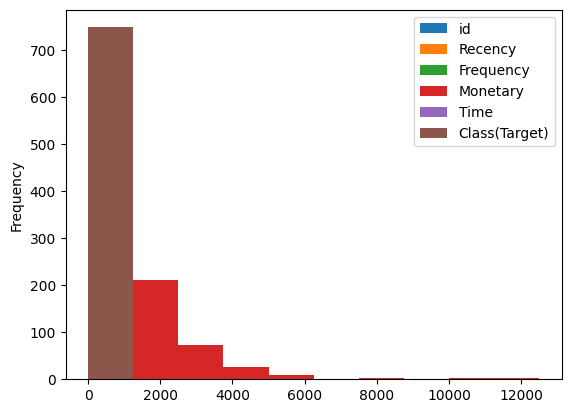

In [9]:
import matplotlib.pyplot as plt
myData.plot.hist()

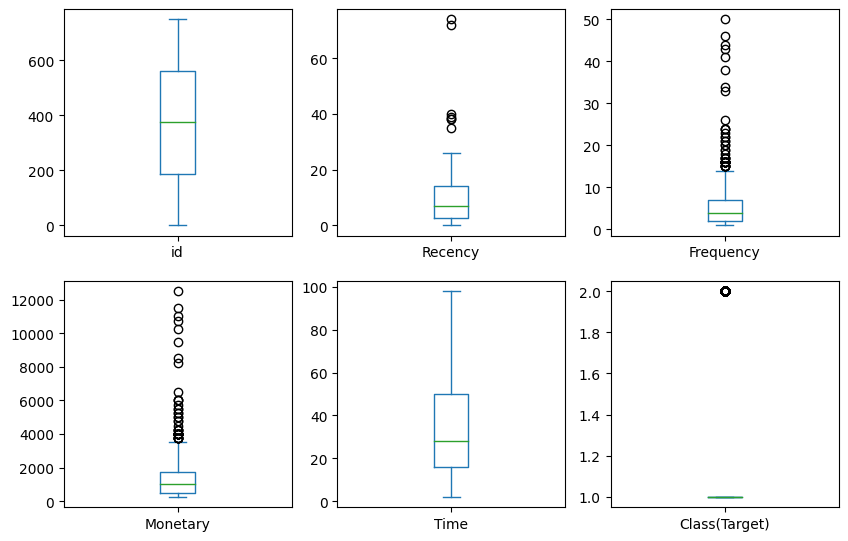

In [10]:
myData.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize = (10,10))
plt.show()

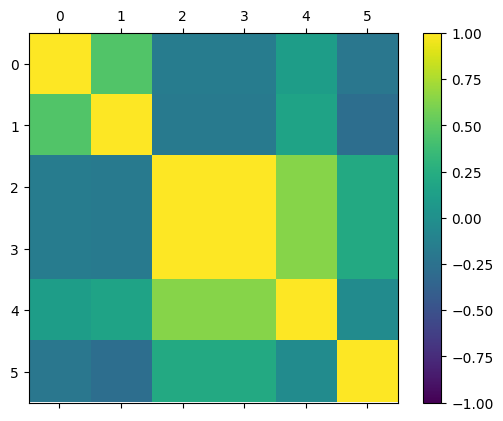

In [11]:
correlations = myData.corr()
# plot correlation matrix
myfig = plt.figure()
axis = myfig.add_subplot(111) # There is only one subplot or graph;
# "111" means "1x1 grid, first subplot"
cax = axis.matshow(correlations, vmin = -1, vmax = 1)
myfig.colorbar(cax)
ticks = np.arange(0, 9, 1)

In [15]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from numpy import set_printoptions
# 
# label_encoder = LabelEncoder()
# 
# categorical_columns = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
# 
# for col in categorical_columns:
#     myData[col] = label_encoder.fit_transform(myData[col])

In [17]:
X = myData.drop('Class(Target)', axis=1).values
Y = myData['Class(Target)'].values

mydataScaler = MinMaxScaler(feature_range=(0, 1))
mydataRescaled = mydataScaler.fit_transform(X)

set_printoptions(precision=3)
print(mydataRescaled[20:25, :])

[[0.027 0.027 0.041 0.041 0.021]
 [0.028 0.054 0.204 0.204 0.271]
 [0.029 0.027 0.102 0.102 0.146]
 [0.031 0.027 0.102 0.102 0.146]
 [0.032 0.122 0.163 0.163 0.146]]


In [18]:
from sklearn.preprocessing import LabelEncoder, Normalizer

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

mydata_train = myData.drop('Class(Target)', axis=1).values
mydata_label = myData['Class(Target)'].values

mydataScaler = Normalizer().fit(mydata_train)
mydataNormalized = mydataScaler.transform(mydata_train)

set_printoptions(precision=3)
print(mydataNormalized[20:25, :])

[[0.028 0.003 0.004 1.    0.005]
 [0.008 0.001 0.004 1.    0.01 ]
 [0.015 0.001 0.004 1.    0.011]
 [0.016 0.001 0.004 1.    0.011]
 [0.011 0.004 0.004 1.    0.007]]


In [19]:
from sklearn.preprocessing import Binarizer

mydataBinarizer = Binarizer(threshold=0.0).fit(mydata_train)
mydatabinarized = mydataBinarizer.transform(mydata_train)
set_printoptions(precision = 3)
print(mydatabinarized[0:5,:])

[[1 1 1 1 1]
 [1 0 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [20]:
from sklearn.feature_selection import SelectKBest, f_regression

myData.replace([np.inf, -np.inf], np.nan, inplace=True)
myData.dropna(inplace=True)

min_value = myData.drop('Class(Target)', axis=1).min().min()
if min_value < 0:
    myData += abs(min_value)

mydata_train = myData.drop('Class(Target)', axis=1).values
mydata_label = myData['Class(Target)'].values

myFeature = SelectKBest(score_func=f_regression, k=4)
fit = myFeature.fit(mydata_train, mydata_label)

set_printoptions(precision=3)
print(fit.scores_)

[33.36  63.397 37.449 37.449  0.96 ]


In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
mydataRFE = RFE(model, n_features_to_select=4)
mydataFit = mydataRFE.fit(mydata_train, mydata_label)

print("Number of features selected: %d" % mydataFit.n_features_)
print("Selected features are denoted by True: %s" % mydataFit.support_)
print("Feature Ranking: %s" % mydataFit.ranking_)

Number of features selected: 4
Selected features are denoted by True: [ True  True False  True  True]
Feature Ranking: [1 1 2 1 1]


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
fit = pca.fit(mydata_train)
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.790e-01 2.086e-02 1.513e-04]
[[-2.474e-02 -1.021e-03  3.999e-03  9.996e-01  1.059e-02]
 [ 9.992e-01  1.644e-02  9.791e-05  2.448e-02  2.588e-02]
 [-2.749e-02  1.263e-01 -4.421e-05 -1.105e-02  9.916e-01]]


In [23]:
pca=PCA(0.92)
selectedFeatures = pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(748, 1)


In [24]:
pca=PCA(0.98)
selectedFeatures=pca.fit_transform(mydata_train)
print (selectedFeatures.shape)

(748, 2)


In [25]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

myData['Class(Target)'] = pd.cut(myData['Class(Target)'], bins=3, labels=[0, 1, 2])
mydata_label = myData['Class(Target)'].values

model = ExtraTreesClassifier()
model.fit(mydata_train, mydata_label)
print(model.feature_importances_)

[0.437 0.167 0.098 0.094 0.205]
